In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))
df

,Index,Price,Production,Withdrawals,GlobalPrice,ExchangeRate,TempMax,TempAvg,Precipitation
Month,,,,,,,,,
2014-09-01,1,51.51,537770.0,1418420,0.1470,44.08,28,27,456.59
2014-10-01,2,51.46,1623075.0,1355836,0.1648,44.80,29,27,436.73
2014-11-01,3,51.28,2277043.0,2156729,0.1588,44.95,29,28,265.32
2014-12-01,4,51.65,2223994.0,1663150,0.1499,44.69,28,27,182.00
2015-01-01,5,51.19,2259613.0,1714490,0.1506,44.60,28,27,82.83
...,...,...,...,...,...,...,...,...,...
2024-04-01,116,85.85,1476667.0,1042072,0.2069,56.95,33,29,22.90
2024-05-01,117,85.54,590428.0,1177536,0.1880,57.76,32,29,130.78
2024-06-01,118,86.73,NaN,1183388,0.1916,58.70,30,28,330.53


# Train test split

In [2]:
total = len(df)
# 80% for train, 20% for test 

train_size = int(total  - 12) 
test_size = total - train_size 


train = df.iloc[:108]
test = df.iloc[108:]

total, train_size, test_size


(120, 108, 12)

(Month
 2014-09-01    51.51
 2014-10-01    51.46
 2014-11-01    51.28
 2014-12-01    51.65
 2015-01-01    51.19
               ...  
 2023-04-01    98.86
 2023-05-01    97.43
 2023-06-01    96.22
 2023-07-01    95.31
 2023-08-01    94.28
 Name: Price, Length: 108, dtype: float64,
 <Axes: xlabel='Month'>)

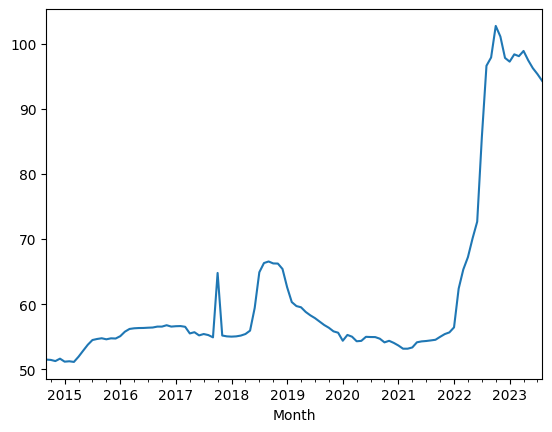

In [3]:
train['Price'],train['Price'].plot()

(Month
 2023-09-01    93.08
 2023-10-01    91.44
 2023-11-01    91.06
 2023-12-01    88.72
 2024-01-01    86.96
 2024-02-01    86.27
 2024-03-01    85.40
 2024-04-01    85.85
 2024-05-01    85.54
 2024-06-01    86.73
 2024-07-01    85.63
 2024-08-01    84.66
 Name: Price, dtype: float64,
 <Axes: xlabel='Month'>)

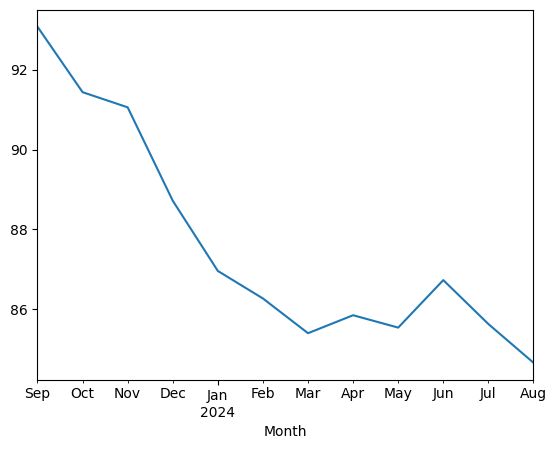

In [4]:
test['Price'], test['Price'].plot()

## Check for Stationarity


In [5]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(data):
    p = adfuller(data)[1]
    print (f'P-value: {p} < 0.05')
    if p < 0.05:
        print('Series is stationary')
    else:
        print('Series is not stationary')

In [6]:
ADF_test(train['Price'])

P-value: 0.8503850142785155 < 0.05
Series is not stationary


P-value: 1.2229376966545057e-05 < 0.05
Series is stationary


(<Axes: title={'center': 'Differenced Price'}, xlabel='Month'>, None)

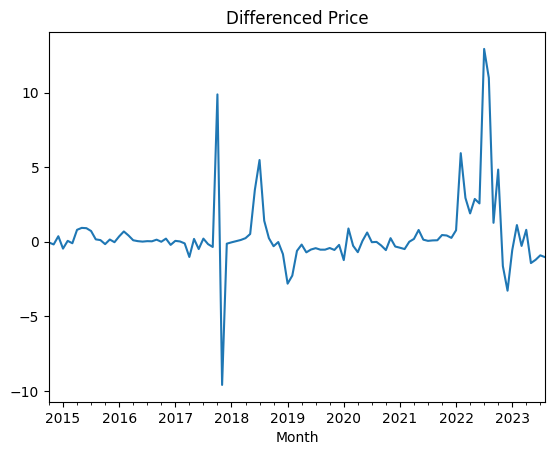

In [7]:
train_diff = train['Price'].diff(1).dropna()

train_diff.plot(title='Differenced Price'), ADF_test(train_diff)

## Modelling

C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

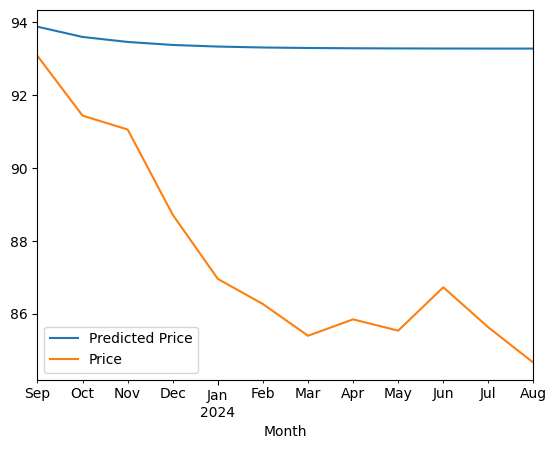

In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Price'], order=(2, 1, 0)).fit()

start = len(train)
end = start + len(test) - 1


pred = model.predict(start=start, end=end, typ='levels', dynamic=False).rename('Predicted Price')
pred.plot(legend=True)
test['Price'].plot(legend=True)

In [9]:
# Compare the predictions with the test set
for i in range(len(pred)):
    print(f'Actual: {test["Price"][i]}, Predicted: {pred[i]}')


Actual: 93.08, Predicted: 93.88039739529532
Actual: 91.44, Predicted: 93.59968469914786
Actual: 91.06, Predicted: 93.46263374922141
Actual: 88.72, Predicted: 93.3798266673296
Actual: 86.96, Predicted: 93.33583862928407
Actual: 86.27, Predicted: 93.31061436064907
Actual: 85.4, Predicted: 93.29679902525177
Actual: 85.85, Predicted: 93.28902219726417
Actual: 85.54, Predicted: 93.2847157635287
Actual: 86.73, Predicted: 93.28230757079592
Actual: 85.63, Predicted: 93.28096876760893
Actual: 84.66, Predicted: 93.28022186210413


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  108
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -242.890
Date:                Wed, 16 Apr 2025   AIC                            491.780
Time:                        21:49:48   BIC                            499.799
Sample:                    09-01-2014   HQIC                           495.031
                         - 08-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2239      0.039      5.752      0.000       0.148       0.300
ar.L2          0.1857      0.091      2.032      0.042       0.007       0.365
sigma2         5.4780      0.302     18.124      0.000       4.886       6.070
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               860.27
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              65.17   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

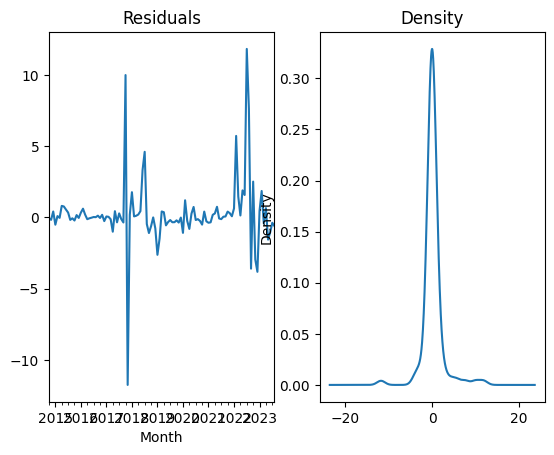

In [11]:
residuals = model.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Forecasting

In [12]:
final_model = ARIMA(df['Price'], order=(2, 1, 0)).fit()
forecast = final_model.predict(len(df), len(df) + 23, typ='levels').rename('Forecasted Price')

forecast

C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2024-09-01    84.227472
2024-10-01    83.942323
2024-11-01    83.794164
2024-12-01    83.705556
2025-01-01    83.656870
2025-02-01    83.628733
2025-03-01    83.612958
2025-04-01    83.603952
2025-05-01    83.598865
2025-06-01    83.595974
2025-07-01    83.594337
2025-08-01    83.593408
2025-09-01    83.592881
2025-10-01    83.592582
2025-11-01    83.592413
2025-12-01    83.592317
2026-01-01    83.592262
2026-02-01    83.592232
2026-03-01    83.592214
2026-04-01    83.592204
2026-05-01    83.592198
2026-06-01    83.592195
2026-07-01    83.592193
2026-08-01    83.592192
Freq: MS, Name: Forecasted Price, dtype: float64

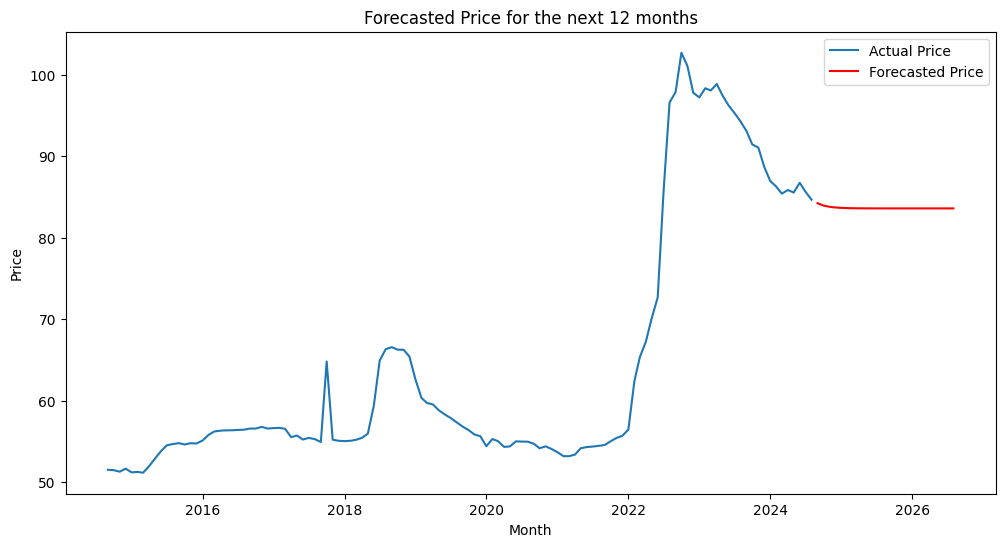

In [13]:
# plotting actual and forecasted values

plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Actual Price')
plt.plot(forecast, label='Forecasted Price', color='red')
plt.title('Forecasted Price for the next 12 months')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  120
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -265.004
Date:                Wed, 16 Apr 2025   AIC                            536.008
Time:                        21:49:48   BIC                            544.345
Sample:                    09-01-2014   HQIC                           539.393
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2277      0.036      6.358      0.000       0.157       0.298
ar.L2          0.1925      0.082      2.336      0.020       0.031       0.354
sigma2         5.0260      0.253     19.852      0.000       4.530       5.522
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1116.04
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             1.01
Prob(H) (two-sided):                  0.53   Kurtosis:                        17.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""